<a href="https://colab.research.google.com/github/vis-hal-k/Data_science_self-Practice/blob/main/Coursera_course/%23C1-IntroToTensorFlow%26ML-AI-DL/Week-4_MATERIAL/Horses_Humans_classifierLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 : Traning with ImageDataGenerator

In this lab, you will buila a train a model on the [Horses of Humans]() dataset.
This contains over a thousand images of horse and humans with varying poses and filesizes. You will use [ImageDataGenerator]() class to prepare this dataset so it can be fed to a convolutional neural Network.
IMPORTANT NOTE: This notebook is designed to run as a Colab. Running in on your local machine might result in some of the code blocks throwing an errors.

Run the code below to download the compressed ziped dataset of `horse-or-huma.zip`.

After that we have to Unzip this file.

In [1]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-06-29 16:02:09--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  43.2MB/s    in 3.8s    

2023-06-29 16:02:13 (37.6 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



The `!wget` command is followed by the URL of the file you want to download. When executed, it sends a request to the server hosting the file and downloads it to your local environment, typically in the current working directory.

Example:
`!wget https://example.com/dataset.csv`

In this example, the !wget command is used to download a dataset file called dataset.csv from the specified URL (https://example.com/dataset.csv). When you execute this code in a Jupyter Notebook cell, the file will be downloaded and saved in the current working directory of your notebook environment.

In [2]:
# unzip
import zipfile
local_zip = "/content/horse-or-human.zip"
zip_ref = zipfile.ZipFile(local_zip , 'r')
zip_ref.extractall('/content/horse-or-human')
zip_ref.close()


The contents of the .zip are extracted to the base directory `./horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.

In short: The training set is the data that is used to tell the neural network model that 'this is what a horse looks like' and 'this is what a human looks like'.

One thing to pay attention to in this sample: We do not explicitly label the images as horses or humans. You will use the ImageDataGenerator API instead -- and this is coded to automatically label images according to the directory names and structure. So, for example, you will have a 'training' directory containing a 'horses' directory and a 'humans' one. `ImageDataGenerator` will label the images appropriately for you, reducing a coding step.

You can now define each of these directories:

In [3]:
import os
# Directory with our training horse pictures
train_horse_dir = os.path.join('/content/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/content/horse-or-human/humans')


Now we see what the filenames look like in the `horses` and `humans`` training directories:

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_humans_names = os.listdir(train_human_dir)
print(train_humans_names)

['horse02-0.png', 'horse49-9.png', 'horse18-3.png', 'horse24-8.png', 'horse22-8.png', 'horse39-1.png', 'horse23-3.png', 'horse03-7.png', 'horse28-5.png', 'horse04-4.png']
['human10-29.png', 'human05-16.png', 'human14-12.png', 'human01-15.png', 'human09-12.png', 'human04-27.png', 'human15-24.png', 'human05-05.png', 'human13-11.png', 'human13-00.png', 'human09-21.png', 'human03-26.png', 'human12-29.png', 'human04-18.png', 'human17-17.png', 'human06-04.png', 'human09-30.png', 'human02-28.png', 'human17-13.png', 'human16-06.png', 'human12-21.png', 'human06-03.png', 'human12-18.png', 'human07-22.png', 'human06-21.png', 'human04-00.png', 'human11-07.png', 'human04-01.png', 'human11-05.png', 'human16-29.png', 'human17-20.png', 'human09-03.png', 'human01-07.png', 'human03-18.png', 'human05-03.png', 'human13-02.png', 'human14-00.png', 'human09-24.png', 'human08-04.png', 'human12-07.png', 'human12-16.png', 'human09-25.png', 'human12-28.png', 'human11-02.png', 'human15-12.png', 'human03-23.png', 

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

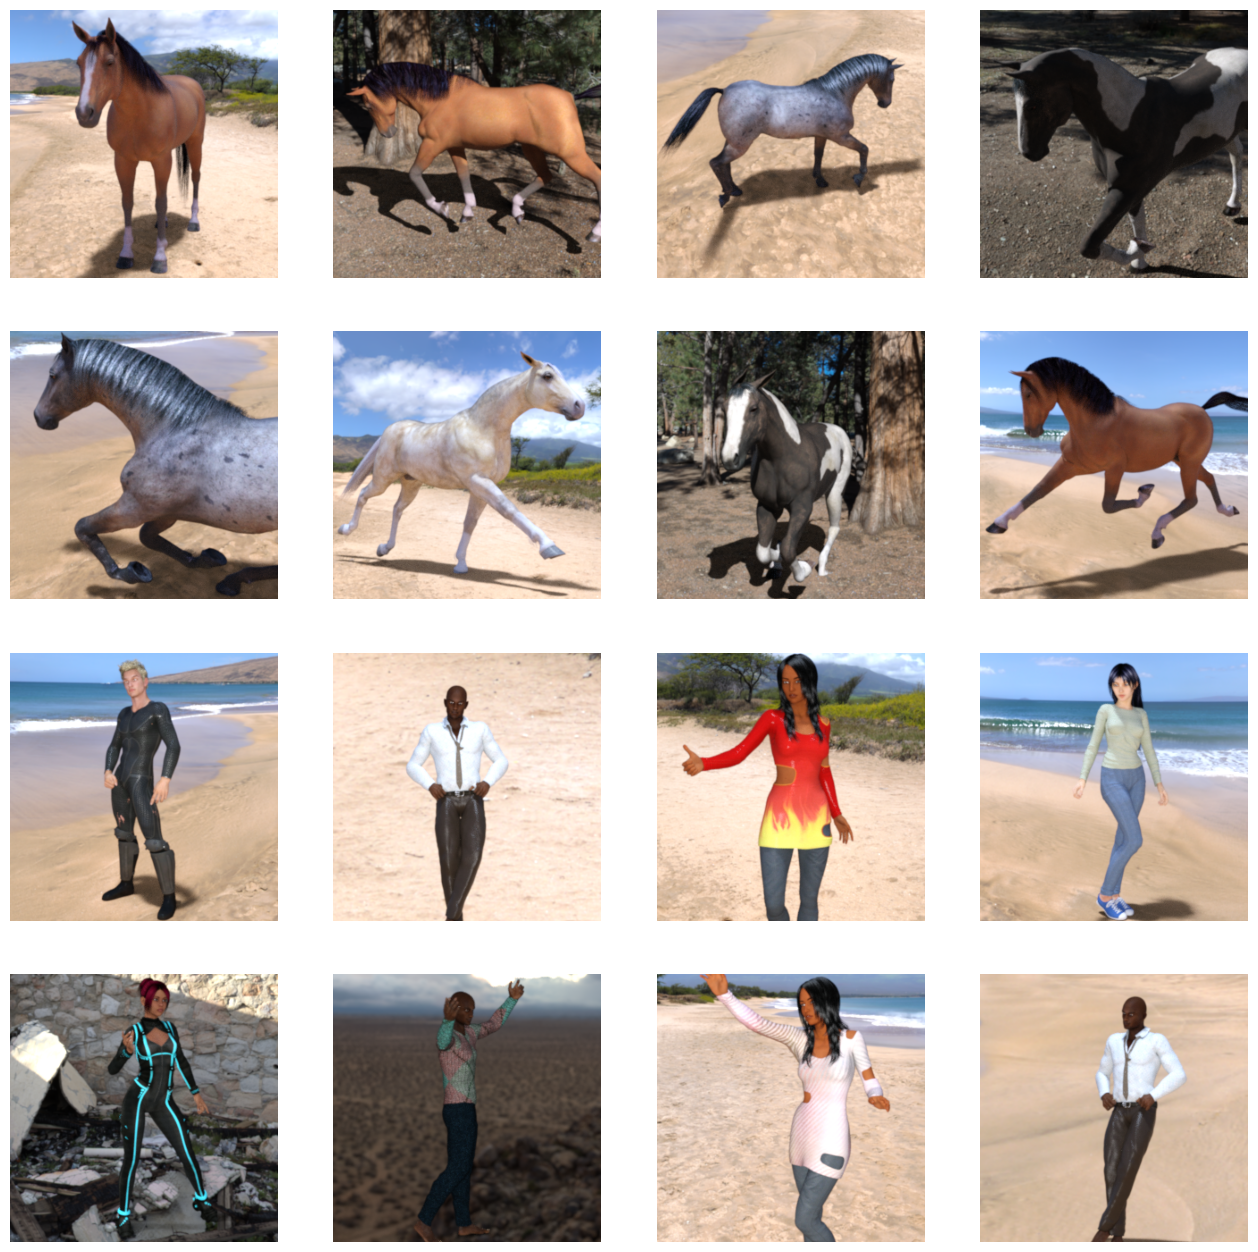

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_humans_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


You then add convolutional layers as in the previous example, and flatten the final result to feet into the densely connected layers. Note that becuae this is a two-class classification problem, i.e. a *binary classification problem* you will end you network with a [*sigmoid* activation](https://wikipedia.org/wiki/Sigmoid_function). This makes the output value of your network a single scaslar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # Thisi is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu' , input_shaope = (300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The third convolution
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu' ),
    tf.keras.layers.MaxPooling2D(2,2),

     # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')

])